# Machine Learning Model ANN

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(15,10)})
warnings.filterwarnings('ignore')

In [273]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [274]:
# Dataset generated in previous phase
data = pd.read_csv('./data_f1/cleaned_data.csv')

In [275]:
x = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]

In [276]:
x = x[x['active_constructor']==1]
x = x[x['active_driver']==1]

In [277]:
sc  = StandardScaler()
le = LabelEncoder()
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],1)
y = x['position'].apply(lambda x: position_index(x))

In [278]:
# Separate the test data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [279]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)

In [280]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(6,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [281]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 32)                224       
                                                                 
 dense_83 (Dense)            (None, 32)                1056      
                                                                 
 dense_84 (Dense)            (None, 32)                1056      
                                                                 
 dense_85 (Dense)            (None, 32)                1056      
                                                                 
 dense_86 (Dense)            (None, 16)                528       
                                                                 
 dense_87 (Dense)            (None, 4)                 68        
                                                                 
Total params: 3,988
Trainable params: 3,988
Non-train

In [282]:
opt = optimizers.Adamax(learning_rate=0.01)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [283]:
callback_list = [
       tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=7,
            restore_best_weights=True,
            verbose=1
       )         
]

In [284]:
res = model.fit(x=X_train, 
                y=y_train, 
                epochs=50,
                validation_split=0.2,
                callbacks=callback_list)

Epoch 1/50
55/55 [==============================] - 1s 4ms/step - loss: 0.7012 - accuracy: 0.7002 - val_loss: 0.5257 - val_accuracy: 0.8128
Epoch 2/50
55/55 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.8230 - val_loss: 0.4401 - val_accuracy: 0.8379
Epoch 3/50
55/55 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8424 - val_loss: 0.4162 - val_accuracy: 0.8516
Epoch 4/50
55/55 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8561 - val_loss: 0.4406 - val_accuracy: 0.8562
Epoch 5/50
55/55 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8669 - val_loss: 0.3619 - val_accuracy: 0.8813
Epoch 6/50
55/55 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8715 - val_loss: 0.4249 - val_accuracy: 0.8516
Epoch 7/50
55/55 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8738 - val_loss: 0.4416 - val_accuracy: 0.8311
Epoch 8/50
55/55 [==

In [285]:
df = pd.DataFrame(res.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.701208,0.700171,0.525700,0.812785
1,0.469974,0.822958,0.440085,0.837900
2,0.446029,0.842376,0.416181,0.851598
3,0.391502,0.856082,0.440590,0.856164
4,0.385846,0.866933,0.361862,0.881279
5,0.383722,0.871502,0.424864,0.851598
6,0.362411,0.873786,0.441567,0.831050
7,0.360357,0.884637,0.357173,0.881279
8,0.318116,0.903484,0.442732,0.847032
9,0.346583,0.882353,0.323488,0.901827


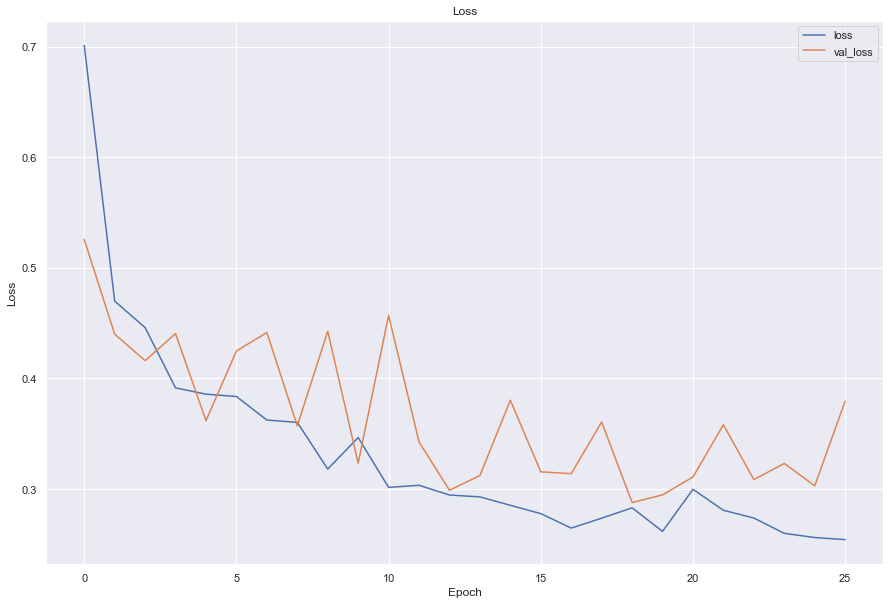

In [286]:
plt.plot(res.epoch, df.loss, label='loss')
plt.plot(res.epoch, df.val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

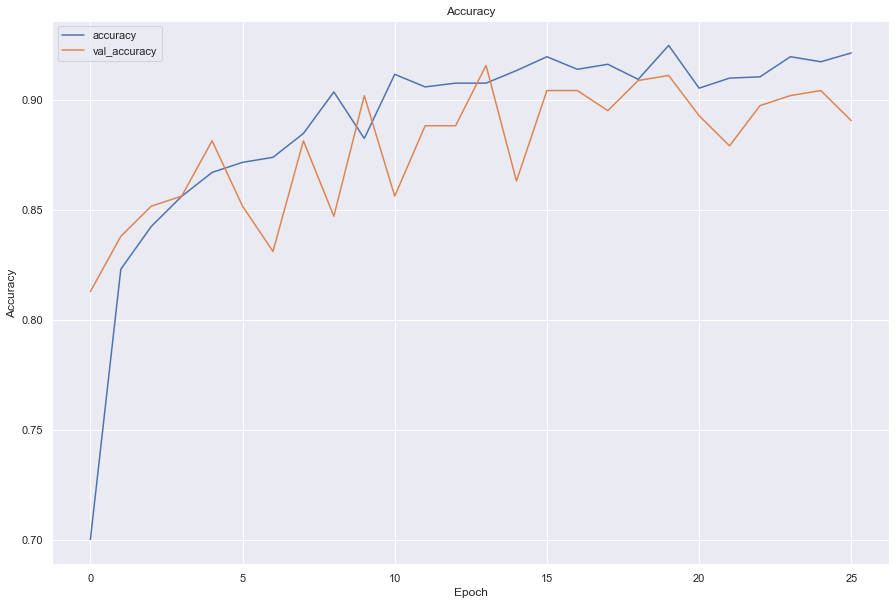

In [287]:
plt.plot(res.epoch, df.accuracy, label='accuracy')
plt.plot(res.epoch, df.val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [288]:
pred = model.predict(X_test)
pred = np.argmax(pred,1)
print('Misclassified examples: %d' % (y_test != pred).sum())

18/18 [==============================] - 0s 1ms/step
Misclassified examples: 42


In [289]:
# Evaluate model
(test_loss, test_accuracy) = model.evaluate(x=X_test,y=y_test)
print("Loss:", test_loss)
print('Accuracy', test_accuracy)

18/18 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9234
Loss: 0.2595455050468445
Accuracy 0.9233576655387878


In [ ]:
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['1','2','3'], yticklabels=['1','2','3'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [36]:
# save model
path='./web/model/model.h5'
model.save(path)